In [1]:
# !pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets

In [36]:
from tensorflow import keras

In [59]:
from keras.optimizers import adam_v2
from keras.utils.np_utils import to_categorical  

In [23]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
import PIL
from PIL import Image

## Index

1. [Method 1 - Logistic Regression](#Method-1---Logistic-Regression)
2. [Method 2 - Support Vector Machines](#Method-2---Support-Vector-Machines)
3. [Method 3 - Deep Neural Network without Convolution](Method-3---Deep-Neural-Network-without-Convolution)
4. [Method 4 - Deep Neural Network with Convolution](#Method-4---Deep-Neural-Network-with-Convolution)


## Metrics


1. Accuracy
2. Confusion Matrix

Classification report

3. Precision (macro, micro, ave)
4. Recall (macro, micro, ave)
5. F1 (macro, micro, ave)
6. ROC Curves
6. Log time



[Classification Metrics](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)

## Loading the Data

In [6]:
cifar10 = datasets.cifar10.load_data()

In [7]:
cifar10[1][0].shape

(10000, 32, 32, 3)

In [8]:
cifar10[0][1].shape

(50000, 1)

In [9]:
x_train,y_train, x_test , y_test = cifar10[0][0], cifar10[0][1], cifar10[1][0], cifar10[1][1]

In [10]:
print(f"X train: {x_train.shape}")
print(f"Y train: {y_train.shape}")
print(f"X test: {x_test.shape}")
print(f"Y test: {y_test.shape}")

X train: (50000, 32, 32, 3)
Y train: (50000, 1)
X test: (10000, 32, 32, 3)
Y test: (10000, 1)


In [11]:
classes = list(np.unique(y_train))

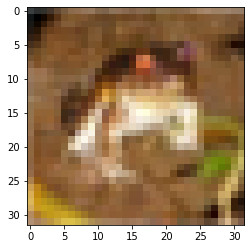

In [12]:
plt.imshow(x_train[0])

In [13]:
len(classes)

10

In [14]:

labels = ['airplane',
'automobile', 
'bird',
'cat',
'deer',
'dog',
'frog',
'horse', 
'ship', 
'truck']

label_dict = {idx: val for idx, val in enumerate(labels)}

In [15]:
label_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

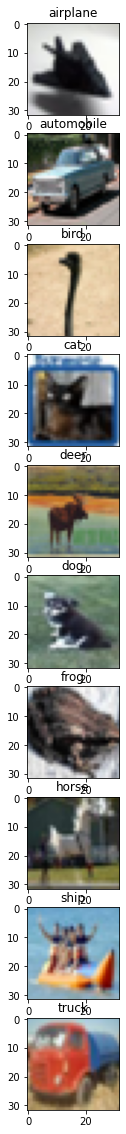

In [16]:
#exploring the data
c = 0
plt.figure(figsize=(100,20))
ax = [None for i in range(len(classes))]
for i in range(len(y_train)):
    if y_train[i] == c:
        ax[c] = plt.subplot(10, 1, c+1)
        ax[c].imshow(x_train[i])
        plt.title(label_dict[c])
        c += 1
    if c == len(classes):
        break

plt.show()

## Method 1 - Logistic Regression

Loading the dataset and building train and test sets

In [4]:
# dependencies
import numpy as np

#################### Your Code ####################
ROOT_PATH='/Users/smoothoperator/Documents/SML/Final Project/'  # Modify this line with the path to the folder where folder "cifar-10-batches-py" locate
###################################################

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [9]:
#Define batches
batch1 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_1")
batch2 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_2")
batch3 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_3")
batch4 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_4")
batch5 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_5")
test_batch = unpickle(ROOT_PATH+"cifar-10-batches-py/test_batch")

In [10]:
def load_data0(btch):
    labels = btch[b'labels']
    imgs = btch[b'data'].reshape((-1, 32, 32, 3))
    
    res = []
    for ii in range(imgs.shape[0]):
        img = imgs[ii].copy()
        img = np.fliplr(np.rot90(np.transpose(img.flatten().reshape(3,32,32)), k=-1))
        res.append(img)
    imgs = np.stack(res)
    return labels, imgs


def load_data():
    x_train_l = []
    y_train_l = []
    for ibatch in [batch1, batch2, batch3, batch4, batch5]:
        labels, imgs = load_data0(ibatch)
        x_train_l.append(imgs)
        y_train_l.extend(labels)
    x_train = np.vstack(x_train_l)
    y_train = np.vstack(y_train_l)
    
    x_test_l = []
    y_test_l = []
    labels, imgs = load_data0(test_batch)
    x_test_l.append(imgs)
    y_test_l.extend(labels)
    x_test = np.vstack(x_test_l)
    y_test = np.vstack(y_test_l)
    return (x_train, y_train), (x_test, y_test)


In [11]:
(x_train, y_train), (x_test, y_test) = load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
del batch1, batch2, batch3, batch4, batch5, test_batch

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:

#################### Your Code ####################



###################################################

## Method 2 - Support Vector Machines

In [18]:
from sklearn import svm

### Treat data

In [19]:
## Reshaping the data
x_train_svm = x_train.reshape(x_train.shape[0], -1)
x_test_svm = x_test.reshape(x_test.shape[0], -1)

In [20]:
## Normalizing the data
x_train_svm = x_train_svm / 255.0
x_test_svm = x_test_svm / 255.0

### Linear Kernel


In [24]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [26]:
for train_index, test_index in sss.split(x_train_svm, y_train):
    X_train_split, X_test_split = x_train_svm[train_index], x_train_svm[test_index]
    y_train_split, y_test_split = y_train[train_index], y_train[test_index]

In [ ]:
for train_index, test_index in sss.split(x_test_svm, y_test):
    X_train_split, X_test_split = x_train_svm[train_index], x_train_svm[test_index]
    y_train_split, y_test_split = y_train[train_index], y_train[test_index]

In [29]:
X_test_split.shape

(10000, 3072)

In [30]:
%time
clf = svm.SVC(probability = False, kernel = 'linear', verbose=True)



Wall time: 0 ns


In [31]:
%time
clf.fit(X_test_split, y_test_split)

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LibSVM]

SVC(kernel='linear', verbose=True)

In [32]:
y_train_pred = clf.predict(X_test_split)
# y_test_pred = clf.predict(x_test_svm)

In [33]:
print(classification_report(y_test_split, y_train_pred, target_names=labels))

              precision    recall  f1-score   support

    airplane       0.86      0.90      0.88      1000
  automobile       0.93      0.96      0.95      1000
        bird       0.82      0.84      0.83      1000
         cat       0.82      0.84      0.83      1000
        deer       0.88      0.84      0.86      1000
         dog       0.87      0.85      0.86      1000
        frog       0.91      0.91      0.91      1000
       horse       0.93      0.88      0.91      1000
        ship       0.92      0.91      0.92      1000
       truck       0.93      0.94      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Method 3 - Deep Neural Network without Convolution

In [41]:
BATCH_SIZE = 256

In [52]:
# ## Reshaping the data
# x_train_nn = x_train.reshape(x_train.shape[0], -1)
# x_test_nn = x_test.reshape(x_test.shape[0], -1)

In [53]:
## Normalizing the data
x_train_nn = x_train / 255.0
x_test_nn = x_test / 255.0

In [60]:
y_train_nn = to_categorical(y_train, num_classes=10)
y_test_nn = to_categorical(y_test, num_classes=10)


In [61]:
def network_1(input_shape):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (32,32,3)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    opt = adam_v2.Adam()
    model.compile(optimizer = opt,
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [83]:
def network_2(input_shape):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (32,32,3)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    opt = adam_v2.Adam()
    model.compile(optimizer = opt,
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [62]:
m1 = network_1(x_train_nn.shape[1:])

In [67]:
history = m1.fit(x_train_nn, y_train_nn, 
       batch_size=BATCH_SIZE, 
       epochs = 20, 
       validation_split=0.2, 
       use_multiprocessing=True, verbose = 1)

Epoch 1/20
157/157 [==============================] - 2s 9ms/step - loss: 1.9159 - accuracy: 0.3033 - val_loss: 1.8125 - val_accuracy: 0.3469
Epoch 2/20
157/157 [==============================] - 1s 7ms/step - loss: 1.6962 - accuracy: 0.3927 - val_loss: 1.7098 - val_accuracy: 0.3978
Epoch 3/20
157/157 [==============================] - 1s 7ms/step - loss: 1.6163 - accuracy: 0.4245 - val_loss: 1.6794 - val_accuracy: 0.4038
Epoch 4/20
157/157 [==============================] - 1s 7ms/step - loss: 1.5589 - accuracy: 0.4445 - val_loss: 1.5777 - val_accuracy: 0.4367
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 1.5168 - accuracy: 0.4588 - val_loss: 1.5467 - val_accuracy: 0.4523
Epoch 6/20
157/157 [==============================] - 1s 7ms/step - loss: 1.4813 - accuracy: 0.4712 - val_loss: 1.5366 - val_accuracy: 0.4533
Epoch 7/20
157/157 [==============================] - 1s 7ms/step - loss: 1.4417 - accuracy: 0.4867 - val_loss: 1.5466 - val_accuracy: 0.4583
Epoch 

In [68]:
y_pred = m1.predict(x_test_nn)

In [70]:
y_pred = y_pred.argmax(axis = 1)

In [82]:
print(classification_report(y_pred, y_test.reshape(-1), target_names=labels))

              precision    recall  f1-score   support

    airplane       0.56      0.57      0.56       978
  automobile       0.64      0.63      0.63      1010
        bird       0.41      0.40      0.41      1020
         cat       0.46      0.34      0.39      1369
        deer       0.34      0.52      0.41       644
         dog       0.36      0.42      0.39       868
        frog       0.56      0.56      0.56       999
       horse       0.54      0.56      0.55       979
        ship       0.62      0.65      0.63       951
       truck       0.62      0.53      0.57      1182

    accuracy                           0.51     10000
   macro avg       0.51      0.52      0.51     10000
weighted avg       0.52      0.51      0.51     10000



In [84]:
m2 = network_2(x_train_nn.shape[1:])

In [89]:
history = m2.fit(x_train_nn, y_train_nn, 
       batch_size=BATCH_SIZE, 
       epochs = 20, 
       validation_split=0.2, 
       use_multiprocessing=True, verbose = 1)

Epoch 1/20
157/157 [==============================] - 1s 9ms/step - loss: 1.0131 - accuracy: 0.6345 - val_loss: 1.5038 - val_accuracy: 0.4984
Epoch 2/20
157/157 [==============================] - 1s 9ms/step - loss: 0.9839 - accuracy: 0.6449 - val_loss: 1.5345 - val_accuracy: 0.4965
Epoch 3/20
157/157 [==============================] - 1s 9ms/step - loss: 0.9310 - accuracy: 0.6678 - val_loss: 1.5267 - val_accuracy: 0.5019
Epoch 4/20
157/157 [==============================] - 1s 9ms/step - loss: 0.9017 - accuracy: 0.6767 - val_loss: 1.5913 - val_accuracy: 0.4950
Epoch 5/20
157/157 [==============================] - 1s 8ms/step - loss: 0.8653 - accuracy: 0.6877 - val_loss: 1.5837 - val_accuracy: 0.4955
Epoch 6/20
157/157 [==============================] - 1s 8ms/step - loss: 0.8326 - accuracy: 0.7014 - val_loss: 1.6137 - val_accuracy: 0.4942
Epoch 7/20
157/157 [==============================] - 1s 8ms/step - loss: 0.7890 - accuracy: 0.7179 - val_loss: 1.7231 - val_accuracy: 0.4822
Epoch 

In [86]:
y_pred = m2.predict(x_test_nn)

In [87]:
y_pred = y_pred.argmax(axis = 1)

In [88]:
print(classification_report(y_pred, y_test.reshape(-1), target_names=labels))

              precision    recall  f1-score   support

    airplane       0.58      0.58      0.58       996
  automobile       0.51      0.66      0.57       766
        bird       0.29      0.47      0.36       620
         cat       0.34      0.34      0.34      1000
        deer       0.47      0.42      0.45      1121
         dog       0.45      0.39      0.42      1135
        frog       0.47      0.61      0.53       780
       horse       0.63      0.49      0.55      1289
        ship       0.57      0.65      0.60       882
       truck       0.69      0.49      0.57      1411

    accuracy                           0.50     10000
   macro avg       0.50      0.51      0.50     10000
weighted avg       0.52      0.50      0.50     10000



## Method 4 - Deep Neural Network with Convolution¶